In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, HTML

,Unnamed: 0,X,y
count,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.005000,30.852884
std,1154.844867,11.548449,32.525128
min,0.000000,-20.000000,-150.000000
25%,999.750000,-10.002500,11.520831
50%,1999.500000,-0.005000,31.300053
75%,2999.250000,9.992500,52.339514
max,3999.000000,19.990000,128.782166


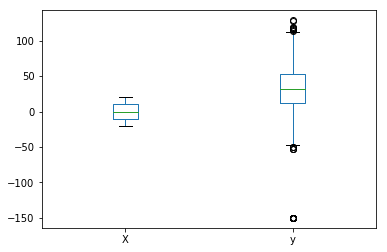

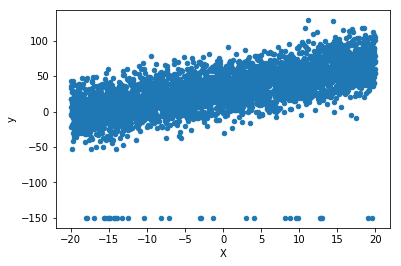

In [9]:
# Analisis preliminar de datos

df=pd.read_csv('laboratorio_aguas.csv')

display(HTML(df.describe().to_html()))
df[['X','y']].plot.box()
df.plot.scatter(x='X',y='y')

#plt.savefig('scatter.pdf',format='pdf')

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# split training and text data
X=df.as_matrix(['X'])
y=df.as_matrix(['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4200)

/Users/ronaldmorales/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/Users/ronaldmorales/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [11]:
# Create linear regression object
regr = linear_model.LinearRegression()
#testing other linear alorithms
# regr=linear_model.Ridge(alpha=.1)

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients: 
 [[1.84952696]]
Intercept:  [30.99856303]


regressor score                |      0.41
Mean squared error             |    533.05
mean_squared_error             |    533.05
mean_absolute_error            |     16.05
median_absolute_error          |     12.52
explained_variance_score       |      0.41
r ^ 2 score                    |      0.41


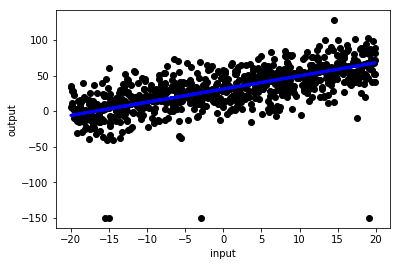

In [12]:
from sklearn.metrics import accuracy_score,median_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_log_error,explained_variance_score


def test_model(X_test,y_test,regr):
  #prediction
  y_pred=regr.predict(X_test)
  ##graficas

  plt.scatter(X_test, y_test,  color='black')
  plt.plot(X_test, regr.predict(X_test), color='blue',linewidth=3)
  plt.xlabel('input')
  plt.ylabel('output')


  # https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
  print('{0:30} | {1:9.2f}'.format('regressor score', regr.score(X_test,y_test)))
  print('{0:30} | {1:9.2f}'.format('Mean squared error', np.mean((y_pred - y_test) ** 2)))
  print('{0:30} | {1:9.2f}'.format('mean_squared_error', mean_squared_error(y_test,y_pred)))
  #print('{0:30} | {1:9.2f}'.format('mean_squared_log_error', mean_squared_log_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('mean_absolute_error', mean_absolute_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('median_absolute_error', median_absolute_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('explained_variance_score', explained_variance_score(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('r ^ 2 score', r2_score(y_test,y_pred)))
    
test_model (X_test, y_test, regr)

In [13]:
def conversor(x):
  return regr.predict(x)

In [14]:
#saving the model (just one time after training)
import pickle #for save the model

name_file='lineardiabetes.pkl'
myfile = open(name_file, 'wb')
pickle.dump(regr,myfile)
myfile.close()

In [15]:
import pickle #for save the model
def conversor(x,model_file):
  # load the model with the trained model 
  ## example, this function can be a web server in django 
  new_file = open(model_file, 'rb')
  clf2 = pickle.load(new_file)
  return clf2.predict(x)


# after this point a lot of data engineering would be required...

In [16]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score


regressors = [linear_model.LinearRegression(),linear_model.Ridge(alpha=.7),MLPRegressor(hidden_layer_sizes=(22,100,),activation='relu',max_iter=100000),linear_model.RANSACRegressor(random_state=0)]
names = ['lineal','ridge 0.7','MLP','RANSAC']
#from https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring =['explained_variance',
          'neg_mean_absolute_error',
          'neg_mean_squared_error',
          'neg_mean_squared_log_error',
          'neg_median_absolute_error',
          'r2']



for reg,name in zip(regressors,names):
    scores = cross_val_score(reg, X_train, y_train.ravel(), scoring=scoring[5],
                            cv=5)
    print('--------------------------------------')
    print('model {0:20} | score {1:20}'.format(name,scoring[5]))
    print('mean {0:22.2f}| std   {1:<22.2f}'.format(scores.mean(),scores.std()))
    print("Accuracy(95.7%): {0:23.2f} (+/- {1:.2f})" .format(scores.mean(), scores.std() * 2))
    



--------------------------------------
model lineal               | score r2                  
mean                   0.42| std   0.06                  
Accuracy(95.7%):                    0.42 (+/- 0.12)
--------------------------------------
model ridge 0.7            | score r2                  
mean                   0.42| std   0.06                  
Accuracy(95.7%):                    0.42 (+/- 0.12)
--------------------------------------
model MLP                  | score r2                  
mean                   0.41| std   0.06                  
Accuracy(95.7%):                    0.41 (+/- 0.12)
--------------------------------------
model RANSAC               | score r2                  
mean                   0.39| std   0.07                  
Accuracy(95.7%):                    0.39 (+/- 0.14)


regressor score                |      0.41
Mean squared error             |   1374.42
mean_squared_error             |    534.47
mean_absolute_error            |     16.09
median_absolute_error          |     12.11
explained_variance_score       |      0.41
r ^ 2 score                    |      0.41


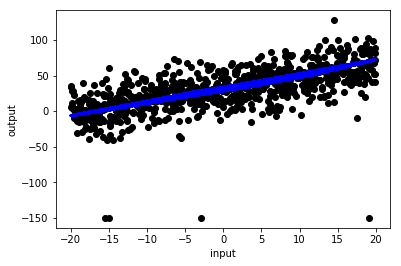

In [42]:
#after this point repeat test and implementation process whith the best model.
model=regressors[2].fit(X_train,y_train.ravel())
test_model(X_test,y_test,model)

In [12]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause

import pandas
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
#diabetes = datasets.load_diabetes()
#diabetes['feature_names'].append('Y')
#data=pandas.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],columns= diabetes['feature_names'])
#descripcion=data.describe()
#print(descripcion)

data = pandas.read_csv('diabetes.data.txt',sep='\t')
descripcion=data.describe()
display(HTML(data.describe().to_html()))

Automatically created module for IPython interactive environment


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [18]:
'''
BMI
'''
%matplotlib inline
import pickle #for save the model
from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.cross_validation import train_test_split
# de acuerdo a la version scikit train_test_split puede ser
from sklearn.model_selection import train_test_split


diabetes_X = data.as_matrix(['BMI'])
diabetes_Y =data['Y']








/Users/ronaldmorales/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [19]:
plt.figure(figsize=(20,10))
for factor in data.keys():
    diabetes_X = data.as_matrix([factor])

/Users/ronaldmorales/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1440x720 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.spatial


diabetes_X = data.as_matrix(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6'])
#diabetes_X = data.as_matrix(['S6','BMI'])



/Users/ronaldmorales/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [8]:
import pandas as pd
from IPython.display import display, HTML

dataf = pd.read_csv('guia_fasecolda.csv')

In [9]:
import pandas
import numpy as np
from sklearn import datasets, linear_model

In [7]:
dataf = pandas.read_csv('guia_fasecolda.csv')
descripcion=dataf.describe()
display(HTML(dataf.describe().to_html()))



,Codigo,HomologoCodigo,Peso,IdServicio,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Bcpp,Importado,Potencia,Cilindraje,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Um,PesoCategoria
count,1.243300e+04,0.0,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.00000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,1.243300e+04,12433.000000,1.243300e+04,1.243300e+04,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000
mean,8.406562e+06,NaN,1777.958015,1.226253,38.888442,50.859809,55.026140,72.848870,82.803024,86.653261,92.260114,100.474544,117.504223,134.277326,211.791201,209.758707,232.868173,257.212258,271.152578,330.082040,393.966862,445.798279,521.414783,580.143167,730.127081,814.888603,1024.264457,1276.396686,1480.47012,1752.597925,1755.222392,2119.256012,2211.691466,2321.862785,2501.681010,2771.043192,3263.728786,3792.323655,4591.963323,5477.313601,6794.499316,7796.331537,9096.765061,8432.478887,8195.447599,9933.559881,11420.373200,12368.696212,12199.927612,14772.605164,1.361666e+04,12813.431995,8.599155e+04,1.063156e+05,0.840666,134.683021,2584.716319,4.555055,2394.048420,2.951983,0.550068,2.048580,0.033942,1.045041
std,8.257674e+06,NaN,2152.615612,0.418421,748.805754,868.556571,920.438342,1084.171113,1188.044579,1224.174105,1292.572880,1375.557837,1497.622366,1618.104386,2036.133032,2036.295733,2173.735256,2338.936720,2478.578669,2798.410446,3263.603975,3580.373154,3901.986849,4203.311351,4746.645913,4911.180435,5516.352270,6039.931253,6678.68568,7406.390439,7683.574512,8518.512940,8932.374079,9569.137443,10439.631424,11123.754916,12324.425167,13458.054824,15275.653879,17089.570013,21497.228645,21859.059202,24132.523557,24695.246048,26080.217752,29818.371017,33203.324001,36103.221723,37675.793778,45310.776119,4.899490e+04,49525.622290,8.567971e+04,1.065270e+05,0.366002,96.166467,2308.234051,4.982099,6774.820501,1.770366,0.497507,0.288488,0.181087,0.719219
min,1.010010e+05,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.400000e+03,1.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.201240e+06,NaN,268.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.560000e+04,4.380000e+04,1.000000,80.000000,1339.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000
50%,6.201016e+06,NaN,1355.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000


BMI

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


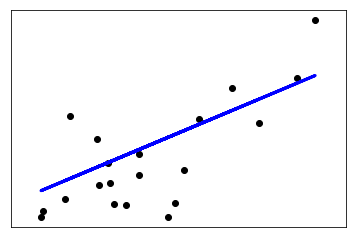

In [21]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()